 ### Objective-To build a decision tree for the promient variable of the bank loan dataset.

In [2]:
#importing the necessary package
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn


In [5]:
#importing the dataset
dataset= pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)
dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [7]:
dataset1=dataset.drop(['ID','ZIP Code','Family'],axis=1)
dataset1.head()

,Age,Experience,Income,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,1.6,1,0,0,1,0,0,0
1,45,19,34,1.5,1,0,0,1,0,0,0
2,39,15,11,1.0,1,0,0,0,0,0,0
3,35,9,100,2.7,2,0,0,0,0,0,0
4,35,8,45,1.0,2,0,0,0,0,0,1


Note: From the Logistic Model we have found the most prominet variables i.e. mentioned in the day21 file.
    hence building the decision tree with the important features only, Income, CCAvg, Education, Securities Account, CD Account, Online, CreditCard.

In [21]:
#As we know the important features are income,CCAvg,Education,SecuritiesAccount,CD Account, online and CreditCard. hence dropping the remaining
dataset1=dataset1.drop(['Age','Experience'],axis=1)
dataset1.head()

,Income,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,49,1.6,1,0,0,1,0,0,0
1,34,1.5,1,0,0,1,0,0,0
2,11,1.0,1,0,0,0,0,0,0
3,100,2.7,2,0,0,0,0,0,0
4,45,1.0,2,0,0,0,0,0,1


In [23]:
#Splitting the dataset
y=dataset1.iloc[:,4:5]
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [24]:
x=dataset1.drop(["Personal Loan"],axis=1)
x.head()

,Income,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,49,1.6,1,0,1,0,0,0
1,34,1.5,1,0,1,0,0,0
2,11,1.0,1,0,0,0,0,0
3,100,2.7,2,0,0,0,0,0
4,45,1.0,2,0,0,0,0,1


In [25]:
#Doing the Train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [27]:
#Importing the necessasry library for decision tree.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [29]:
#Building the DecisionTree model
dt=DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=5)
dt.fit(x_train,y_train)
dt_predt=dt.predict(x_test)
#Accuracy Score
acc=accuracy_score(y_test,dt_predt)*100
print("Accuracy Score",acc)
#Classification Report
Ca=classification_report(y_test,dt_predt)
print("Classification report \n",Ca)
#Confusion matrix
con=confusion_matrix(y_test,dt_predt)
print("Confusion Matrix")
print(con)

Accuracy Score 96.72
Classification report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1121
           1       0.95      0.72      0.82       129

    accuracy                           0.97      1250
   macro avg       0.96      0.86      0.90      1250
weighted avg       0.97      0.97      0.97      1250

Confusion Matrix
[[1116    5]
 [  36   93]]


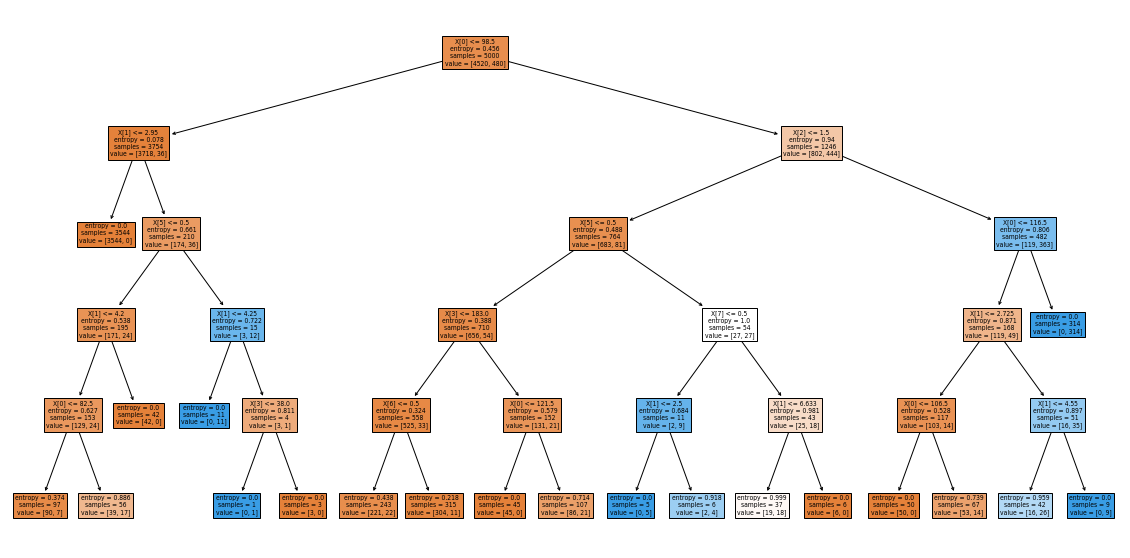

In [30]:
dt1=tree.DecisionTreeClassifier(criterion="entropy",random_state=1,max_depth=5)
dt1=dt1.fit(x,y)
plt.figure(figsize=(20,10))
tree.plot_tree(dt1,filled=True)
plt.show();

**Interperation**
 
  The model gives **96.72%** accuracy score.